# CS5920J Assessed Coursework 
## Assignment 3

### STEP1: Loading Wine and USPS Data Sets into Test and Train data  in Python(This step involves both Task1 and Task2 in the given coursework)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
# loading wine data
from sklearn.datasets import load_wine
winedata = load_wine()
X=winedata.data
Y=winedata.target
xw_train,xw_test,yw_train,yw_test=train_test_split(X,Y,random_state=519)

# loading usps data
usps_test=np.genfromtxt("zip.test",skip_header=1)
usps_train=np.genfromtxt("zip.train",skip_header=1)
# The training and test sets are combined to maintain the consistnecy between the sets
merge_test_train_usps=np.concatenate((usps_train,usps_test),axis=0)
# merge_test_train_usps.shape
y=merge_test_train_usps[0:9296,0]
x=merge_test_train_usps[0:9296,1:257]
xu_train,xu_test,yu_train,yu_test=train_test_split(x,y,random_state=519)


### STEP2 : Predicting the Error Rate with and without using Cross Validation.(This step involves both Task3 and Task4)

In [2]:
# predicting the error rate using svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm=SVC()
cross_val=cross_val_score(svm, xw_train, yw_train)
print('For the Wine Data Set:\n')
print("The Cross_Val score for Wine Data Set is: ",cross_val)
m=np.mean(cross_val)
print("The Test Accuracy for Wine Data Set using Cross_Validation is : "+str(round(m*100,2))+'%')
print("The Test Error Rate for Wine Data Set using Cross_Validation is :"+str(round((1-m)*100,2))+'%')

svm.fit(xw_train,yw_train)
w_acc=svm.score(xw_test,yw_test)
print("The Test Accuracy for Wine Data Set without using Cross_Validation is :"+str(round(w_acc*100,2))+'%')
print("The Test Error Rate for Wine Data Set without using Cross_Validation is :"+str(round((1-w_acc)*100,2))+'%')
print('\n')

cross_val=cross_val_score(svm, xu_train, yu_train)
print('For the USPS Data Set:\n')
print("The Cross_Val score for USPS Data Set is: ",cross_val)
mu=np.mean(cross_val)
print("The Test Accuracy for USPS Data Set using Cross_Validation is : "+str(round(mu*100,2))+'%')
print("The Test Error Rate for USPS Data Set using Cross_Validation is :"+str(round((1-mu)*100,2))+'%')

svm.fit(xu_train,yu_train)
u_acc=svm.score(xu_test,yu_test)
print("The Test Accuracy for USPS Data Set without using Cross_Validation is :"+str(round(u_acc*100,2))+'%')
print("The Test Error Rate for USPS Data Set without using Cross_Validation is :"+str(round((1-u_acc)*100,2))+'%')
print('\n')



For the Wine Data Set:

The Cross_Val score for Wine Data Set is:  [0.74074074 0.74074074 0.77777778 0.84615385 0.61538462]
The Test Accuracy for Wine Data Set using Cross_Validation is : 74.42%
The Test Error Rate for Wine Data Set using Cross_Validation is :25.58%
The Test Accuracy for Wine Data Set without using Cross_Validation is :62.22%
The Test Error Rate for Wine Data Set without using Cross_Validation is :37.78%


For the USPS Data Set:

The Cross_Val score for USPS Data Set is:  [0.98064516 0.96344086 0.9713056  0.96915352 0.97991392]
The Test Accuracy for USPS Data Set using Cross_Validation is : 97.29%
The Test Error Rate for USPS Data Set using Cross_Validation is :2.71%
The Test Accuracy for USPS Data Set without using Cross_Validation is :96.9%
The Test Error Rate for USPS Data Set without using Cross_Validation is :3.1%




### From the above results we observe that estimating error rate using Cross Validation is more accurate.

### STEP3: Finding the accuracy best params and test score using Standard scaler and Normalizer Functions and Predicting the test labels using GridSearchCV.(This step involves both Task 5 and Task 6)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100, 100], 'svc__gamma': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(xw_train, yw_train)
print('Using Standard Scaler Normalization :\n')
print('For the Wine Data Set:\n')
print("Best cross-validation accuracy for Wine Data Set: "+str(round(grid.best_score_*100,2))+'%')
print("Best parameters for Wine Data Set: ", grid.best_params_)
print("Test score for Wine Data Set: "+str(round(grid.score(xw_test, yw_test)*100,2))+'%')
print('\n')
ugrid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
ugrid.fit(xu_train, yu_train)
print('For the USPS Data Set:\n')
print("Best cross-validation accuracy for USPS Data Set: "+str(round(ugrid.best_score_*100,2))+'%')
print("Best parameters for USPS Data Set: ", ugrid.best_params_)
print("Test score for USPS Data Set: "+str(round(ugrid.score(xu_test, yu_test)*100,2))+'%')
print('\n')




Using Standard Scaler Normalization :

For the Wine Data Set:

Best cross-validation accuracy for Wine Data Set: 99.26%
Best parameters for Wine Data Set:  {'svc__C': 1, 'svc__gamma': 0.1}
Test score for Wine Data Set: 97.78%


For the USPS Data Set:

Best cross-validation accuracy for USPS Data Set: 93.42%
Best parameters for USPS Data Set:  {'svc__C': 10, 'svc__gamma': 0.01}
Test score for USPS Data Set: 94.28%




In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
pipe = make_pipeline(Normalizer(), SVC())
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100, 100], 'svc__gamma': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(xw_train, yw_train)
print('Using Normalizer Normalization :\n')
print('For the Wine Data Set:\n')
print("Best cross-validation accuracy for Wine Data Set: "+str(round(grid.best_score_*100,2))+'%')
print("Best parameters for Wine Data Set: ", grid.best_params_)
print("Test score for Wine Data Set: "+str(round(grid.score(xw_test, yw_test)*100,2))+'%')
print('\n')
ugrid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
ugrid.fit(xu_train, yu_train)
print('For the USPS Data Set:\n')
print("Best cross-validation accuracy for USPS Data Set: "+str(round(ugrid.best_score_*100,2))+'%')
print("Best parameters for USPS Data Set: ", ugrid.best_params_)
print("Test score for USPS Data Set: "+str(round(ugrid.score(xu_test, yu_test)*100,2))+'%')
print('\n')



Using Normalizer Normalization :

For the Wine Data Set:

Best cross-validation accuracy for Wine Data Set: 90.91%
Best parameters for Wine Data Set:  {'svc__C': 10, 'svc__gamma': 100}
Test score for Wine Data Set: 88.89%


For the USPS Data Set:

Best cross-validation accuracy for USPS Data Set: 97.52%
Best parameters for USPS Data Set:  {'svc__C': 10, 'svc__gamma': 1}
Test score for USPS Data Set: 97.03%




### CONFIRMITY SCORES FOR WINE DATA SET

In [5]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100, 100], 'svc__gamma': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
kf = KFold(shuffle=True, random_state=0)
no_of_splits=kf.get_n_splits
for index, val in kf.split(X):
    xw_train, X_val = X[index], X[val]
    yw_train, Y_val = Y[index], Y[val]
    grid.fit(xw_train,yw_train)
    print("CS:", grid.decision_function(xw_test[0:len(xw_train)])[yw_test[0:len(yw_test)]])

CS: [[ 2.22221367  0.92944381 -0.21128985]
 [ 0.83203067  2.22931833 -0.18105059]
 [ 2.22221367  0.92944381 -0.21128985]
 [-0.21127934  2.24324233  0.83596329]
 [-0.21127934  2.24324233  0.83596329]
 [-0.21127934  2.24324233  0.83596329]
 [ 0.83203067  2.22931833 -0.18105059]
 [ 0.83203067  2.22931833 -0.18105059]
 [ 2.22221367  0.92944381 -0.21128985]
 [-0.21127934  2.24324233  0.83596329]
 [ 2.22221367  0.92944381 -0.21128985]
 [ 0.83203067  2.22931833 -0.18105059]
 [ 2.22221367  0.92944381 -0.21128985]
 [ 0.83203067  2.22931833 -0.18105059]
 [ 2.22221367  0.92944381 -0.21128985]
 [ 2.22221367  0.92944381 -0.21128985]
 [ 0.83203067  2.22931833 -0.18105059]
 [-0.21127934  2.24324233  0.83596329]
 [ 2.22221367  0.92944381 -0.21128985]
 [ 0.83203067  2.22931833 -0.18105059]
 [ 2.22221367  0.92944381 -0.21128985]
 [ 2.22221367  0.92944381 -0.21128985]
 [ 2.22221367  0.92944381 -0.21128985]
 [-0.21127934  2.24324233  0.83596329]
 [-0.21127934  2.24324233  0.83596329]
 [-0.21127934  2.2432

### CONFIRMITY SCORES FOR USPS DATA SET

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100, 100], 'svc__gamma': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
kf = KFold(shuffle=True, random_state=0)
no_of_splits=kf.get_n_splits
for index, val in kf.split(x):
    xu_train, X_val = x[index], x[val]
    yu_train, Y_val = y[index], y[val]
    grid.fit(xu_train,yu_train)
    print("CS:", grid.decision_function(np.int_(xu_test)[0:len(xu_train)])[np.int_(yu_test)[0:len(yu_test)]])

CS: [[-0.30157682  9.31339511  2.73901829 ...  4.75386722  7.25441116
   6.19844681]
 [ 6.17301905  9.27964492  3.86503362 ... -0.28879247  7.26206406
   0.71034666]
 [ 6.17641069 -0.29637966  9.29566387 ...  3.9966245   2.95865522
   0.74308204]
 ...
 [ 6.11916453 -0.29116527  8.25923999 ...  1.80710714  3.88436782
   0.73541167]
 [-0.30157682  9.31339511  2.73901829 ...  4.75386722  7.25441116
   6.19844681]
 [ 7.20524206 -0.29631448  9.27636043 ...  5.16482656  3.09241399
   0.74555672]]


### STEP4: Implementing Cross Confirmal Predictor and plotting the Calibration Curve(This step involves Task7 of course work)

### FOR THE WINE DATASET

In [18]:
import math
import numpy as np
def dist(x1,x2):
  return np.linalg.norm(x1-x2)
n_train = xw_train.shape[0]
n_test = xw_test.shape[0]
dist_own = math.inf * np.ones(n_train)
dist_other = math.inf * np.ones(n_train)
for i in range(n_train-1):
  for j in range(i+1,n_train):
    current_dist = dist(xw_train[i],xw_train[j])
    if yw_train[i]==yw_train[j]:
      if (current_dist < dist_own[i]):
        dist_own[i] = current_dist
      if (current_dist < dist_own[j]):
        dist_own[j] = current_dist
    else:
      if (current_dist < dist_other[i]):
        dist_other[i] = current_dist
      if (current_dist < dist_other[j]):
        dist_other[j] = current_dist

In [19]:
score = np.zeros(n_train+1)  # the conformity scores
p = np.zeros((n_test,3))    # the p-values
for j in range(n_test):
  for l in range(3):   # postulated label
    aug_dist_own = np.append(dist_own,math.inf)
    aug_dist_other = np.append(dist_other,math.inf)
    for i in range(n_train):
      current_dist = dist(xw_train[i],xw_test[j])
      if yw_train[i]==l:
        if (current_dist < aug_dist_own[i]):
          aug_dist_own[i] = current_dist
        if (current_dist < aug_dist_own[n_train]):
          aug_dist_own[n_train] = current_dist
      else:
        if (current_dist < aug_dist_other[i]):
          aug_dist_other[i] = current_dist
        if (current_dist < aug_dist_other[n_train]):
          aug_dist_other[n_train] = current_dist
    # the following for loop is the careful version of score = aug_dist_other / aug_distance_own
    for i in range(n_train+1):
      if aug_dist_own[i] == 0:
        score[i] = math.inf
        if (aug_dist_other[i] == 0):
          score[i] = 0
      else:
        score[i] = aug_dist_other[i] / aug_dist_own[i]
    p[j,l] = np.mean(score<=score[n_train])

Text(0, 0.5, 'Significant Level')

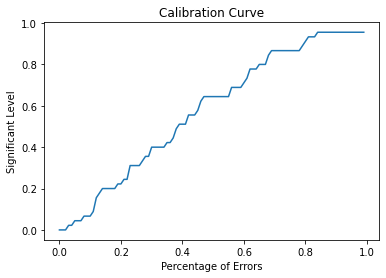

In [20]:
import matplotlib.pyplot as plt
eps = np.zeros(100) 
err = np.zeros(100) 
for k in range(100):
  eps[k] = k/100     
  err[k] = 0         
  for j in range(n_test):
    if (p[j,yw_test[j]] <= eps[k]):  
      err[k] = err[k] + 1  
  err[k] = err[k] / n_test 
plt.plot(eps,err)
plt.title("Calibration Curve")
plt.xlabel("Percentage of Errors")
plt.ylabel("Significant Level")


### FOR THE USPS DATA SET

In [3]:
import math
import numpy as np
def dist1(x1,x2):
  return np.linalg.norm(x1-x2)
n_train = xu_train.shape[0]
n_test = xu_test.shape[0]
dist_own = math.inf * np.ones(n_train)
dist_other = math.inf * np.ones(n_train)
for i in range(n_train-1):
  for j in range(i+1,n_train):
    current_dist = dist1(xu_train[i],xu_train[j])
    if yu_train[i]==yu_train[j]:
      if (current_dist < dist_own[i]):
        dist_own[i] = current_dist
      if (current_dist < dist_own[j]):
        dist_own[j] = current_dist
    else:
      if (current_dist < dist_other[i]):
        dist_other[i] = current_dist
      if (current_dist < dist_other[j]):
        dist_other[j] = current_dist

In [4]:
score = np.zeros(n_train+1)  # the conformity scores
p = np.zeros((n_test,3))    # the p-values
for j in range(n_test):
  for l in range(3):   # postulated label
    aug_dist_own = np.append(dist_own,math.inf)
    aug_dist_other = np.append(dist_other,math.inf)
    for i in range(n_train):
      current_dist = dist1(xu_train[i],xu_test[j])
      if yu_train[i]==l:
        if (current_dist < aug_dist_own[i]):
          aug_dist_own[i] = current_dist
        if (current_dist < aug_dist_own[n_train]):
          aug_dist_own[n_train] = current_dist
      else:
        if (current_dist < aug_dist_other[i]):
          aug_dist_other[i] = current_dist
        if (current_dist < aug_dist_other[n_train]):
          aug_dist_other[n_train] = current_dist
    # the following for loop is the careful version of score = aug_dist_other / aug_distance_own
    for i in range(n_train+1):
      if aug_dist_own[i] == 0:
        score[i] = math.inf
        if (aug_dist_other[i] == 0):
          score[i] = 0
      else:
        score[i] = aug_dist_other[i] / aug_dist_own[i]
    p[j,l] = np.mean(score<=score[n_train])

Text(0, 0.5, 'Significant Level')

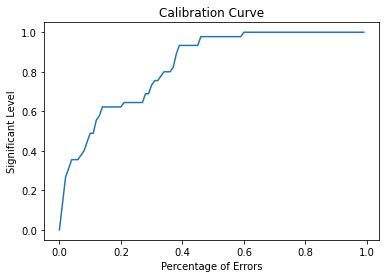

In [21]:
import matplotlib.pyplot as plt
eps = np.zeros(100) 
err = np.zeros(100) 
for k in range(100):
  eps[k] = k/100     
  err[k] = 0         
  for j in range(n_test):
    if (p[j,np.int_(yu_test[1])] <= eps[k]):  
      err[k] = err[k] + 1  
  err[k] = err[k] / n_test 
plt.plot(eps,err)
plt.title("Calibration Curve")
plt.xlabel("Percentage of Errors")
plt.ylabel("Significant Level")



### NOTE : For the Step 4 labworksheet week9 of CourseWork is used due to some circumstances.